In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

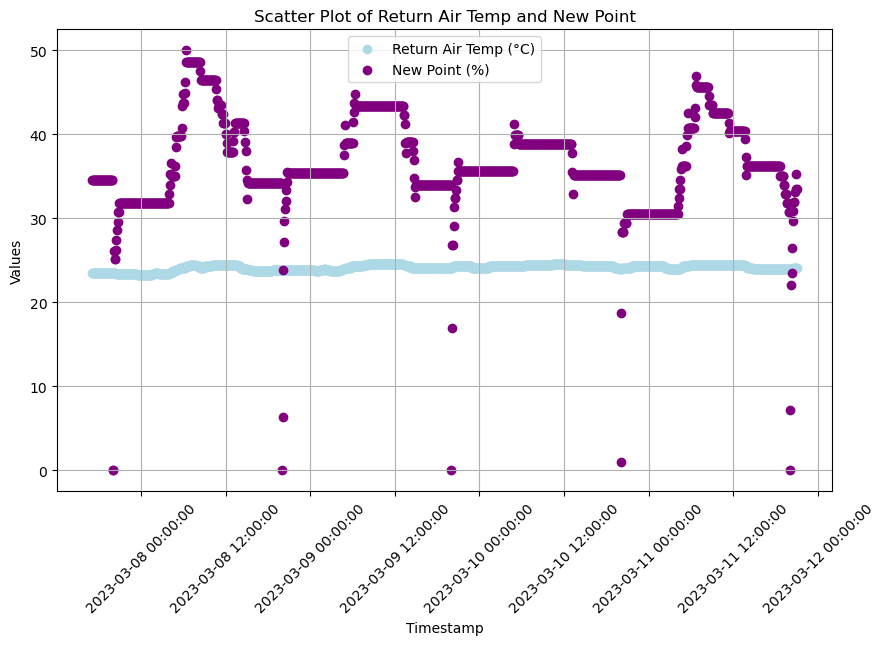

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the data from the CSV file
data = pd.read_csv(r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\masterTable1_data1_e.csv')

# Assuming the columns are named as in your example
data.columns = ['ts', 'DMC Building 1 Data Quality Tests Dup of AHU_04_B1 Return Air Temp', 'DMC Building 1 Data Quality Tests New-Point']

# Convert the timestamp to a proper datetime format
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), format='%Y-%m-%dT%H:%M:%S%z')

# Remove the unit from the temperature and convert to numeric
data['DMC Building 1 Data Quality Tests Dup of AHU_04_B1 Return Air Temp'] = data['DMC Building 1 Data Quality Tests Dup of AHU_04_B1 Return Air Temp'].str.replace('°C', '').astype(float)

# Convert the percentage to numeric
data['DMC Building 1 Data Quality Tests New-Point'] = data['DMC Building 1 Data Quality Tests New-Point'].str.replace('%', '').astype(float)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data['ts'], data['DMC Building 1 Data Quality Tests Dup of AHU_04_B1 Return Air Temp'], color='lightblue', label='Return Air Temp (°C)')
plt.scatter(data['ts'], data['DMC Building 1 Data Quality Tests New-Point'], color='purple', label='New Point (%)')

# Formatting the x-axis to show full datetime
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Scatter Plot of Return Air Temp and New Point')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


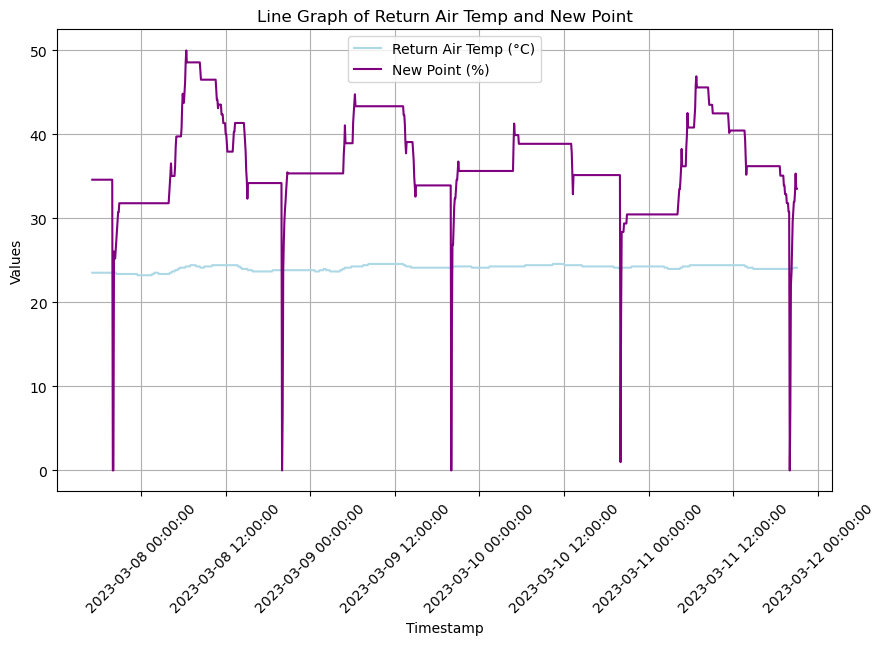

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the data from the CSV file
data = pd.read_csv(r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\masterTable1_data1_e.csv')

# Assuming the columns are named as in your example
data.columns = ['ts', 'DMC Building 1 Data Quality Tests Dup of AHU_04_B1 Return Air Temp', 'DMC Building 1 Data Quality Tests New-Point']

# Convert the timestamp to a proper datetime format
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), format='%Y-%m-%dT%H:%M:%S%z')

# Remove the unit from the temperature and convert to numeric
data['DMC Building 1 Data Quality Tests Dup of AHU_04_B1 Return Air Temp'] = data['DMC Building 1 Data Quality Tests Dup of AHU_04_B1 Return Air Temp'].str.replace('°C', '').astype(float)

# Convert the percentage to numeric
data['DMC Building 1 Data Quality Tests New-Point'] = data['DMC Building 1 Data Quality Tests New-Point'].str.replace('%', '').astype(float)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['ts'], data['DMC Building 1 Data Quality Tests Dup of AHU_04_B1 Return Air Temp'], color='lightblue', label='Return Air Temp (°C)')
plt.plot(data['ts'], data['DMC Building 1 Data Quality Tests New-Point'], color='purple', label='New Point (%)')

# Formatting the x-axis to show full datetime
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Line Graph of Return Air Temp and New Point')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [19]:
pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB 6.3 MB/s eta 0:00:03
   - -------------------------------------- 0.6/13.3 MB 6.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/13.3 MB 5.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.9/13.3 MB 5.1 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/13.3 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.3/13.3 MB 4.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.4/13.3 MB 4.3 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/13.3 MB 4.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.7/13.3 MB 3.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.9/13.3 MB 3.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.0/13.3 MB 3.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/13.3 MB 3.8 MB/s eta 0:00:03
   ---

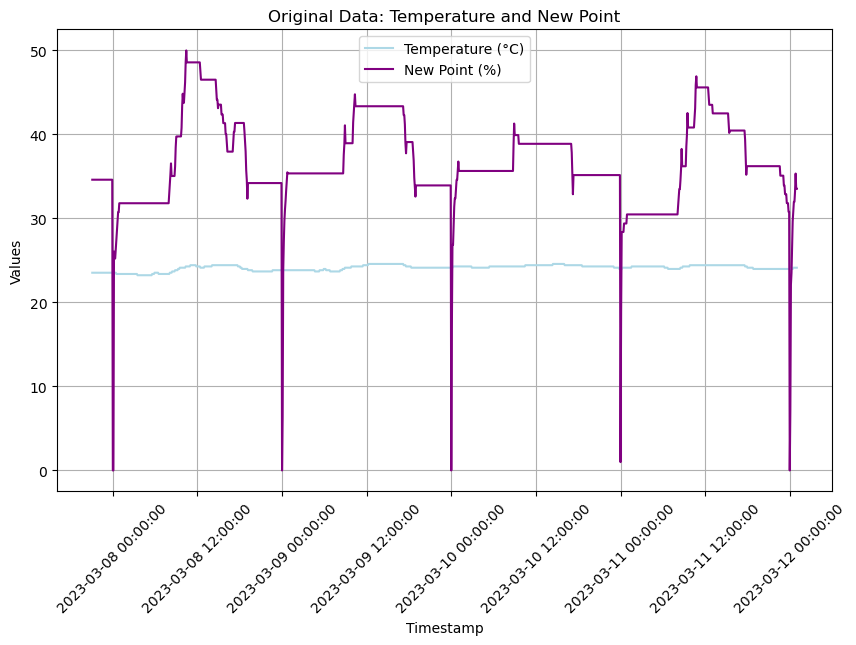

18:08:44 - cmdstanpy - INFO - Chain [1] start processing
18:08:46 - cmdstanpy - INFO - Chain [1] done processing


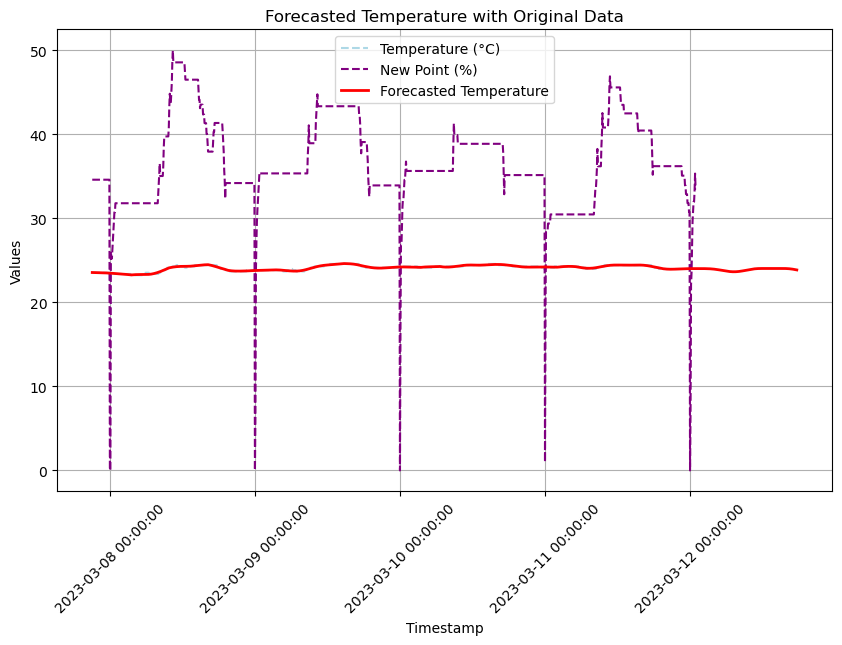

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from prophet import Prophet

# Read the data from the CSV file
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\masterTable1_data1_e.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp', 'new_point']

# Remove ' Dubai' and separate timezone offset
data['ts'] = data['ts'].str.replace(' Dubai', '')
data['ts'] = data['ts'].apply(lambda x: x[:-6])  # Remove last 6 characters (timezone offset)
data['ts'] = pd.to_datetime(data['ts'], format='%Y-%m-%dT%H:%M:%S')

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Convert percentage to numeric
data['new_point'] = data['new_point'].str.replace('%', '').astype(float)

# Plotting original data
plt.figure(figsize=(10, 6))
plt.plot(data['ts'], data['temp'], color='lightblue', label='Temperature (°C)')
plt.plot(data['ts'], data['new_point'], color='purple', label='New Point (%)')

# Formatting the x-axis to show full datetime
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Original Data: Temperature and New Point')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Prepare data for Prophet
df = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(df)

# Create a DataFrame for future dates (next 200 samples, assuming 5-minute intervals)
future = model.make_future_dataframe(periods=200, freq='5T')

# Predict the future values
forecast = model.predict(future)

# Plotting forecasted data
plt.figure(figsize=(10, 6))
plt.plot(data['ts'], data['temp'], color='lightblue', label='Temperature (°C)', linestyle='dashed')
plt.plot(data['ts'], data['new_point'], color='purple', label='New Point (%)', linestyle='dashed')
plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Forecasted Temperature', linewidth=2)

# Formatting the x-axis to show full datetime
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Forecasted Temperature with Original Data')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [35]:
import pandas as pd
from prophet import Prophet

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\masterTable1_data1_e.csv'
data = pd.read_csv(file_path)

# Assuming the columns are named as in your example
data.columns = ['ts', 'temp', 'new_point']

# Clean 'ts' column to remove timezone and convert to datetime
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', '').str.replace('+04:00', ''), format='%Y-%m-%dT%H:%M:%S')

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Clean percentage column and convert to numeric
data['new_point'] = data['new_point'].str.replace('%', '').astype(float)

# Prepare data for Prophet
df = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(df)

# Create a DataFrame for future dates (next 200 samples, assuming 5-minute intervals)
future = model.make_future_dataframe(periods=200, freq='5T')

# Predict the future values
forecast = model.predict(future)

# Combine the original data with the forecast
forecast = forecast[['ds', 'yhat']].rename(columns={'yhat': 'temp'})
combined = pd.concat([df, forecast[-200:]], ignore_index=True)

# Save to CSV in the same folder
output_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\prophet.csv'
combined.to_csv(output_path, index=False)

print(f"Predicted data saved to {output_path}")


18:10:50 - cmdstanpy - INFO - Chain [1] start processing
18:10:50 - cmdstanpy - INFO - Chain [1] done processing


Predicted data saved to C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\prophet.csv


In [45]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\masterTable1_data1_e.csv'
data = pd.read_csv(file_path)

# Assuming the columns are named as in your example
data.columns = ['ts', 'temp', 'new_point']

# Clean 'ts' column to remove timezone and convert to datetime
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', '').str.replace('+04:00', ''), format='%Y-%m-%dT%H:%M:%S')

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Clean percentage column and convert to numeric
data['new_point'] = data['new_point'].str.replace('%', '').astype(float)

# Prepare data for Prophet
df = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(df)

# Create a DataFrame for future dates (next 200 samples, assuming 5-minute intervals)
future = model.make_future_dataframe(periods=200, freq='5T')

# Predict the future values
forecast = model.predict(future)

# Calculate RMSE for the predicted portion only
# Extract actual values from the original data (df)
actual = df['y'].values[-200:]

# Extract predicted values from the forecast
predicted = forecast['yhat'].values[-200:]

# Compute RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"RMSE: {rmse}")

# Combine the original data with the forecast
forecast = forecast[['ds', 'yhat']].rename(columns={'yhat': 'temp'})
combined = pd.concat([df, forecast[-200:]], ignore_index=True)



18:22:44 - cmdstanpy - INFO - Chain [1] start processing
18:22:44 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 0.4355547264288202


In [53]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\masterTable1_data1_e.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp', 'new_point']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce')

# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Clean percentage column and convert to numeric
data['new_point'] = data['new_point'].str.replace('%', '').astype(float)

# Select the relevant column for Prophet and rename it to 'y' (value) and 'ds' (datetime)
df = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})

# Ensure 'ds' column is timezone-naive
df['ds'] = df['ds'].dt.tz_localize(None)

# Initialize the Prophet model with tuned hyperparameters
model = Prophet(seasonality_mode='additive',  # Adjust based on data exploration
                interval_width=0.95,          # Adjust prediction interval if needed
                changepoint_prior_scale=0.05) # Tune based on data patterns

# Fit the model
model.fit(df)

# Create a DataFrame for future dates (next 200 samples, assuming 5-minute intervals)
future = model.make_future_dataframe(periods=200, freq='5T')

# Predict the future values
forecast = model.predict(future)

# Compute RMSE
actual = df['y'].values
predicted = forecast['yhat'].values[-200:]
rmse = np.sqrt(mean_squared_error(actual[-200:], predicted))
print(f"RMSE: {rmse}")

# Combine the original data with the forecast
combined = pd.concat([df, forecast[['ds', 'yhat']].rename(columns={'yhat': 'y'})], ignore_index=True)



18:27:13 - cmdstanpy - INFO - Chain [1] start processing
18:27:14 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 0.4355547264288202


18:38:27 - cmdstanpy - INFO - Chain [1] start processing
18:38:27 - cmdstanpy - INFO - Chain [1] done processing
18:38:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:38:27 - cmdstanpy - INFO - Chain [1] start processing
18:38:33 - cmdstanpy - INFO - Chain [1] done processing


Improved RMSE: 0.5321149956836777


C:\Anaconda\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Anaconda\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Anaconda\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'

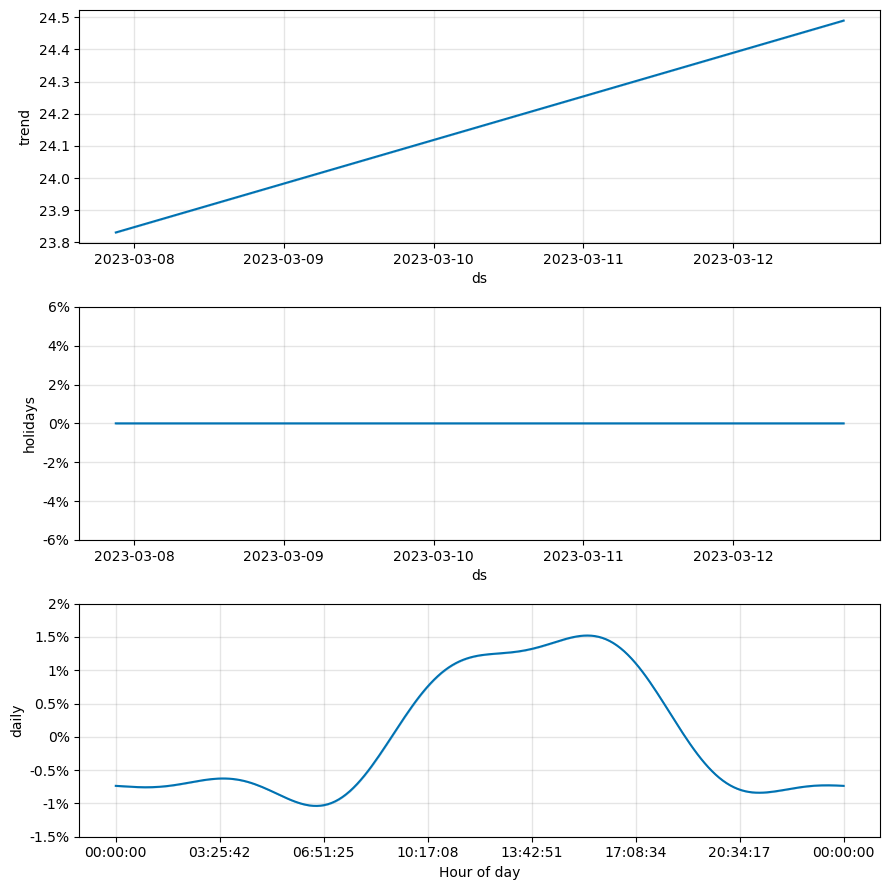

In [68]:
# Adjusting the Prophet model hyperparameters and adding holidays
from prophet.plot import plot_yearly

# Initialize the Prophet model with tuned hyperparameters
model = Prophet(seasonality_mode='multiplicative',  # Adjust based on data exploration
                interval_width=0.95,                # Adjust prediction interval if needed
                changepoint_prior_scale=0.00001)        # Tune based on data patterns

# Add holidays or other important events that may affect temperature
model.add_country_holidays(country_name='US')  # Example: US holidays

# Fit the model
model.fit(df)

# Create a DataFrame for future dates (next 200 samples, assuming 5-minute intervals)
future = model.make_future_dataframe(periods=200, freq='5T')

# Predict the future values
forecast = model.predict(future)

# Compute RMSE
actual = df['y'].values
predicted = forecast['yhat'].values[-200:]
rmse = np.sqrt(mean_squared_error(actual[-200:], predicted))
print(f"Improved RMSE: {rmse}")

# Plot the yearly seasonality to inspect and refine the model
fig = model.plot_components(forecast)


In [72]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\masterTable1_data1_e.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp', 'new_point']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce')

# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Clean percentage column and convert to numeric
data['new_point'] = data['new_point'].str.replace('%', '').astype(float)

# Select the relevant columns for Prophet and rename them to 'y' (value) and 'ds' (datetime)
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})
df_new_point = data[['ts', 'new_point']].rename(columns={'ts': 'ds', 'new_point': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)
df_new_point['ds'] = df_new_point['ds'].dt.tz_localize(None)

# Initialize the Prophet model with tuned hyperparameters for temperature ('temp')
model_temp = Prophet(seasonality_mode='additive',          # Adjust based on data exploration
                     interval_width=0.95,                   # Adjust prediction interval if needed
                     changepoint_prior_scale=0.001)         # Tune based on data patterns

# Initialize the Prophet model with tuned hyperparameters for new_point
model_new_point = Prophet(seasonality_mode='additive',     # Adjust based on data exploration
                          interval_width=0.95,              # Adjust prediction interval if needed
                          changepoint_prior_scale=0.001)    # Tune based on data patterns

# Fit the models
model_temp.fit(df_temp)
model_new_point.fit(df_new_point)

# Create future DataFrame for both temp and new_point (next 200 samples, assuming 5-minute intervals)
future_temp = model_temp.make_future_dataframe(periods=200, freq='5T')
future_new_point = model_new_point.make_future_dataframe(periods=200, freq='5T')

# Predict the future values
forecast_temp = model_temp.predict(future_temp)
forecast_new_point = model_new_point.predict(future_new_point)

# Compute RMSE for temp
actual_temp = df_temp['y'].values
predicted_temp = forecast_temp['yhat'].values[-200:]
rmse_temp = np.sqrt(mean_squared_error(actual_temp[-200:], predicted_temp))
print(f"RMSE for temp: {rmse_temp}")

# Compute RMSE for new_point
actual_new_point = df_new_point['y'].values
predicted_new_point = forecast_new_point['yhat'].values[-200:]
rmse_new_point = np.sqrt(mean_squared_error(actual_new_point[-200:], predicted_new_point))
print(f"RMSE for new_point: {rmse_new_point}")

# Combine the original data with the forecasted values for both temp and new_point
combined_temp = pd.concat([df_temp, forecast_temp[['ds', 'yhat']].rename(columns={'yhat': 'y'})], axis=1)
combined_new_point = pd.concat([df_new_point, forecast_new_point[['ds', 'yhat']].rename(columns={'yhat': 'y'})], axis=1)

# Save the combined DataFrame to a CSV file
save_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\fp1.csv'
combined_temp.to_csv(save_path, index=False)


18:42:37 - cmdstanpy - INFO - Chain [1] start processing
18:42:38 - cmdstanpy - INFO - Chain [1] done processing
18:42:38 - cmdstanpy - INFO - Chain [1] start processing
18:42:38 - cmdstanpy - INFO - Chain [1] done processing


RMSE for temp: 0.42033800677131944
RMSE for new_point: 8.8068360174763


In [74]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\masterTable1_data1_e.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp', 'new_point']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce')

# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Clean percentage column and convert to numeric
data['new_point'] = data['new_point'].str.replace('%', '').astype(float)

# Select the relevant columns for Prophet and rename them to 'y' (value) and 'ds' (datetime)
df_new_point = data[['ts', 'new_point']].rename(columns={'ts': 'ds', 'new_point': 'y'})

# Ensure 'ds' column is timezone-naive
df_new_point['ds'] = df_new_point['ds'].dt.tz_localize(None)

# Initialize the Prophet model with tuned hyperparameters for new_point
model_new_point = Prophet(seasonality_mode='additive',     # Adjust based on data exploration
                          interval_width=0.95,              # Adjust prediction interval if needed
                          changepoint_prior_scale=0.05)    # Tune based on data patterns

# Fit the model for new_point
model_new_point.fit(df_new_point)

# Create future DataFrame for new_point (next 200 samples, assuming 5-minute intervals)
future_new_point = model_new_point.make_future_dataframe(periods=200, freq='5T')

# Predict the future values for new_point
forecast_new_point = model_new_point.predict(future_new_point)

# Compute RMSE for new_point
actual_new_point = df_new_point['y'].values
predicted_new_point = forecast_new_point['yhat'].values[-200:]
rmse_new_point = np.sqrt(mean_squared_error(actual_new_point[-200:], predicted_new_point))
print(f"Improved RMSE for new_point: {rmse_new_point}")



18:44:00 - cmdstanpy - INFO - Chain [1] start processing
18:44:01 - cmdstanpy - INFO - Chain [1] done processing


Improved RMSE for new_point: 9.058548955562793


In [76]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\masterTable1_data1_e.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp', 'new_point']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce')

# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Clean percentage column and convert to numeric
data['new_point'] = data['new_point'].str.replace('%', '').astype(float)

# Separate data for temperature and new_point
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})
df_new_point = data[['ts', 'new_point']].rename(columns={'ts': 'ds', 'new_point': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)
df_new_point['ds'] = df_new_point['ds'].dt.tz_localize(None)

# Initialize Prophet models with tuned hyperparameters
model_temp = Prophet(seasonality_mode='additive',     # Adjust based on data exploration
                     interval_width=0.95,              # Adjust prediction interval if needed
                     changepoint_prior_scale=0.05)    # Tune based on data patterns

model_new_point = Prophet(seasonality_mode='additive',     # Adjust based on data exploration
                          interval_width=0.95,              # Adjust prediction interval if needed
                          changepoint_prior_scale=0.05)    # Tune based on data patterns

# Fit the models
model_temp.fit(df_temp)
model_new_point.fit(df_new_point)

# Create future DataFrames for both temp and new_point (next 200 samples, assuming 5-minute intervals)
future_temp = model_temp.make_future_dataframe(periods=200, freq='5T')
future_new_point = model_new_point.make_future_dataframe(periods=200, freq='5T')

# Predict the future values
forecast_temp = model_temp.predict(future_temp)
forecast_new_point = model_new_point.predict(future_new_point)

# Compute RMSE for temp
actual_temp = df_temp['y'].values
predicted_temp = forecast_temp['yhat'].values[-200:]
rmse_temp = np.sqrt(mean_squared_error(actual_temp[-200:], predicted_temp))
print(f"Improved RMSE for temp: {rmse_temp}")

# Compute RMSE for new_point
actual_new_point = df_new_point['y'].values
predicted_new_point = forecast_new_point['yhat'].values[-200:]
rmse_new_point = np.sqrt(mean_squared_error(actual_new_point[-200:], predicted_new_point))
print(f"Improved RMSE for new_point: {rmse_new_point}")

# Combine the original data with the forecasted values for temp and new_point
combined_temp = pd.concat([df_temp, forecast_temp[['ds', 'yhat']].rename(columns={'yhat': 'y'})], axis=1)
combined_new_point = pd.concat([df_new_point, forecast_new_point[['ds', 'yhat']].rename(columns={'yhat': 'y'})], axis=1)

# Save the combined DataFrames to separate CSV files
save_path_temp = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\fp2.csv'
save_path_new_point = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\fp3.csv'

combined_temp.to_csv(save_path_temp, index=False)
combined_new_point.to_csv(save_path_new_point, index=False)


18:50:01 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] done processing
18:50:02 - cmdstanpy - INFO - Chain [1] start processing
18:50:02 - cmdstanpy - INFO - Chain [1] done processing


Improved RMSE for temp: 0.4355547264288202
Improved RMSE for new_point: 9.058548955562793


In [80]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\Train.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp', 'new_point']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce')

# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Clean percentage column and convert to numeric
data['new_point'] = data['new_point'].str.replace('%', '').astype(float)

# Separate data for temperature and new_point
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})
df_new_point = data[['ts', 'new_point']].rename(columns={'ts': 'ds', 'new_point': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)
df_new_point['ds'] = df_new_point['ds'].dt.tz_localize(None)

# Initialize Prophet models with tuned hyperparameters
model_temp = Prophet(seasonality_mode='additive',     # Adjust based on data exploration
                     interval_width=0.95,              # Adjust prediction interval if needed
                     changepoint_prior_scale=0.001)    # Tune based on data patterns

model_new_point = Prophet(seasonality_mode='additive',     # Adjust based on data exploration
                          interval_width=0.95,              # Adjust prediction interval if needed
                          changepoint_prior_scale=0.0001)    # Tune based on data patterns

# Fit the models
model_temp.fit(df_temp)
model_new_point.fit(df_new_point)

# Create future DataFrames for both temp and new_point (next 200 samples, assuming 5-minute intervals)
future_temp = model_temp.make_future_dataframe(periods=200, freq='5T')
future_new_point = model_new_point.make_future_dataframe(periods=200, freq='5T')

# Predict the future values
forecast_temp = model_temp.predict(future_temp)
forecast_new_point = model_new_point.predict(future_new_point)

# Compute RMSE for temp
actual_temp = df_temp['y'].values
predicted_temp = forecast_temp['yhat'].values[-200:]
rmse_temp = np.sqrt(mean_squared_error(actual_temp[-200:], predicted_temp))
print(f"Improved RMSE for temp: {rmse_temp}")

# Compute RMSE for new_point
actual_new_point = df_new_point['y'].values
predicted_new_point = forecast_new_point['yhat'].values[-200:]
rmse_new_point = np.sqrt(mean_squared_error(actual_new_point[-200:], predicted_new_point))
print(f"Improved RMSE for new_point: {rmse_new_point}")

# Combine the original data with the forecasted values for temp and new_point
combined_temp = pd.concat([df_temp, forecast_temp[['ds', 'yhat']].rename(columns={'yhat': 'y'})], axis=1)
combined_new_point = pd.concat([df_new_point, forecast_new_point[['ds', 'yhat']].rename(columns={'yhat': 'y'})], axis=1)

# Save the combined DataFrames to separate CSV files
save_path_temp = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\fp4.csv'
save_path_new_point = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\fp5.csv'

combined_temp.to_csv(save_path_temp, index=False)
combined_new_point.to_csv(save_path_new_point, index=False)


18:53:08 - cmdstanpy - INFO - Chain [1] start processing
18:53:08 - cmdstanpy - INFO - Chain [1] done processing
18:53:09 - cmdstanpy - INFO - Chain [1] start processing
18:53:09 - cmdstanpy - INFO - Chain [1] done processing
18:53:09 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
18:53:09 - cmdstanpy - INFO - Chain [1] start processing
18:53:11 - cmdstanpy - INFO - Chain [1] done processing


Improved RMSE for temp: 0.5219038793634614
Improved RMSE for new_point: 6.011516834412098


In [82]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\Train.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp', 'new_point']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce')

# Drop rows where datetime parsing failed
data = data.dropna(subset=['ts'])

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Clean percentage column and convert to numeric
data['new_point'] = data['new_point'].str.replace('%', '').astype(float)

# Separate data for temperature and new_point
df_temp = data[['ts', 'temp']].rename(columns={'ts': 'ds', 'temp': 'y'})
df_new_point = data[['ts', 'new_point']].rename(columns={'ts': 'ds', 'new_point': 'y'})

# Ensure 'ds' column is timezone-naive
df_temp['ds'] = df_temp['ds'].dt.tz_localize(None)
df_new_point['ds'] = df_new_point['ds'].dt.tz_localize(None)

# Initialize Prophet models with tuned hyperparameters
model_temp = Prophet(seasonality_mode='additive',     # Adjust based on data exploration
                     interval_width=0.95,              # Adjust prediction interval if needed
                     changepoint_prior_scale=0.01)    # Tune based on data patterns

model_new_point = Prophet(seasonality_mode='additive',     # Adjust based on data exploration
                          interval_width=0.95,              # Adjust prediction interval if needed
                          changepoint_prior_scale=0.01)    # Tune based on data patterns

# Fit the models
model_temp.fit(df_temp)
model_new_point.fit(df_new_point)

# Create future DataFrames for both temp and new_point (next 200 samples, assuming 5-minute intervals)
future_temp = model_temp.make_future_dataframe(periods=200, freq='5T')
future_new_point = model_new_point.make_future_dataframe(periods=200, freq='5T')

# Predict the future values
forecast_temp = model_temp.predict(future_temp)
forecast_new_point = model_new_point.predict(future_new_point)

# Compute RMSE for temp
actual_temp = df_temp['y'].values
predicted_temp = forecast_temp['yhat'].values[-200:]
rmse_temp = np.sqrt(mean_squared_error(actual_temp[-200:], predicted_temp))
print(f"Improved RMSE for temp: {rmse_temp}")

# Compute RMSE for new_point
actual_new_point = df_new_point['y'].values
predicted_new_point = forecast_new_point['yhat'].values[-200:]
rmse_new_point = np.sqrt(mean_squared_error(actual_new_point[-200:], predicted_new_point))
print(f"Improved RMSE for new_point: {rmse_new_point}")

# Combine the original data with the forecasted values for temp and new_point
combined_temp = pd.concat([df_temp, forecast_temp[['ds', 'yhat']].rename(columns={'yhat': 'y'})], axis=1)
combined_new_point = pd.concat([df_new_point, forecast_new_point[['ds', 'yhat']].rename(columns={'yhat': 'y'})], axis=1)

# Save the combined DataFrames to separate CSV files
save_path_temp = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\fp6.csv'
save_path_new_point = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\fp7.csv'

combined_temp.to_csv(save_path_temp, index=False)
combined_new_point.to_csv(save_path_new_point, index=False)


18:57:02 - cmdstanpy - INFO - Chain [1] start processing
18:57:02 - cmdstanpy - INFO - Chain [1] done processing
18:57:02 - cmdstanpy - INFO - Chain [1] start processing
18:57:02 - cmdstanpy - INFO - Chain [1] done processing


Improved RMSE for temp: 0.4174558853453174
Improved RMSE for new_point: 4.701841014710192


In [84]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = r'C:\Users\syounas\OneDrive - Enova Facilities Management\Tasks\GitHub\HubgradeDataCleaning\Sana\Data\Train.csv'
data = pd.read_csv(file_path)

# Rename columns for convenience
data.columns = ['ts', 'temp', 'new_point']

# Convert 'ts' column to datetime and handle timezone offset
data['ts'] = pd.to_datetime(data['ts'].str.replace(' Dubai', ''), errors='coerce')

# Clean temperature column and convert to numeric
data['temp'] = data['temp'].str.replace('°C', '').astype(float)

# Print the first few rows of 'ts' and 'temp' columns
print(data[['ts', 'temp']].head())


                         ts       temp
0 2023-03-07 21:05:00+04:00  23.522282
1 2023-03-07 21:10:00+04:00  23.522282
2 2023-03-07 21:15:00+04:00  23.522282
3 2023-03-07 21:20:00+04:00  23.522282
4 2023-03-07 21:25:00+04:00  23.522282
